##Neural network su FASHION MNIST

Neural network in TensorFlow 2.x, su database FASHION MNIST.

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  print("Problem with TensorFlow version")
  pass

#tf.keras.backend.clear_session()  # For easy reset of notebook state.

print("Done")

TensorFlow 2.x selected.
Done


In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [0]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Done")

Done


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
print("Done")

Done


Exploring db:

In [0]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

print("Done")

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
Done


Guardo le immagini per controllare il formato.

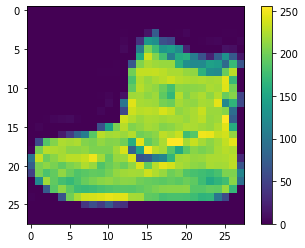

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Aggiusto il formato.

In [0]:
train_images = train_images.astype('float32') / 255.0

test_images = test_images.astype('float32') / 255.0

print("Done")

Done


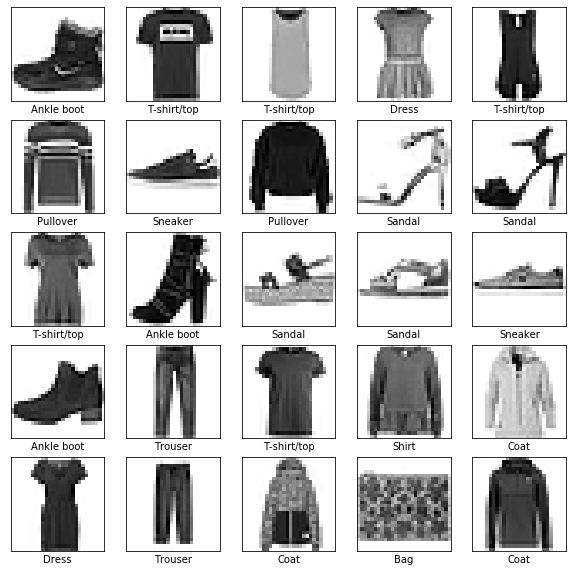

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #class_names[train_labels[i]]
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##Costruzione modello

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    #keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])
print("Done")

Done


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Done")

Done


##Training del modello

In [0]:
model.fit(train_images, train_labels, epochs = 10)

print("Done")

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4745 - accuracy: 0.8300
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3673 - accuracy: 0.8672
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3341 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3114 - accuracy: 0.8858
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2964 - accuracy: 0.8904
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2808 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2683 - accuracy: 0.9012
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2618 - accuracy: 0.9029
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2522 - accuracy: 0.9067
Epoch 10/10
60

##Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3389 - accuracy: 0.8798

Test accuracy: 0.8798


##Predizione

In [0]:
predictions = model.predict(test_images)
print("Done")

Done


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

print("Done")


Done


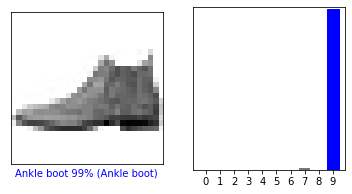

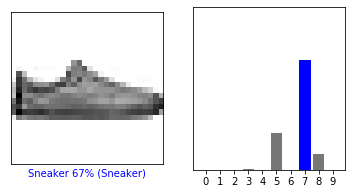

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

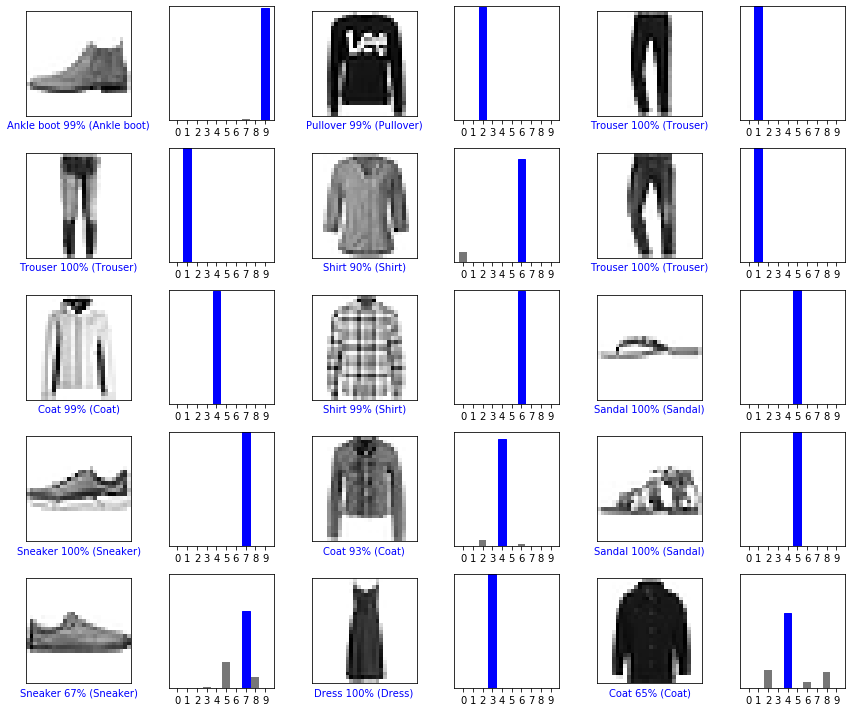

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Ricorda che

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Faccio ora una previsione di una immagine.

(28, 28)
(1, 28, 28)
[[1.1322467e-03 2.8539371e-06 9.9402243e-01 6.0376235e-05 3.4341651e-03
  7.4959144e-07 1.2128694e-03 8.9111569e-07 1.3354530e-04 2.9244593e-08]]


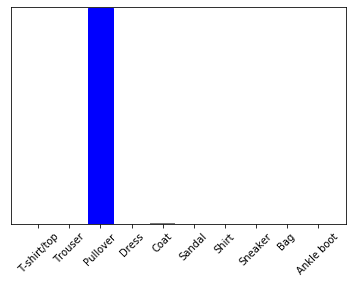

In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [0]:
np.argmax(predictions_single[0])

2

Ossia:

In [0]:
class_names[np.argmax(predictions_single[0])]

'Pullover'